## Helper methods and imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

def get_pca(X, y, num_components):
    pca = PCA(n_components=num_components)
    pca.fit(X)
    transformed_data = pca.transform(X)
    return transformed_data

# assign labels to numbers
def label_to_int(label):
    if label == 'blues':
        return "blue"
    elif label == 'classical':
        return "red"
    elif label == 'country':
        return "green"
    elif label == 'disco':
        return "cyan"
    elif label == 'hiphop':
        return "yellow"
    elif label == 'jazz':
        return "#7FFF00"
    elif label == 'metal':
        return "gray"
    elif label == 'pop':
        return "black"
    elif label == 'reggae':
        return "orange"
    elif label == 'rock':
        return "purple"

## Regular Data (No preprocessing)

In [31]:
# load data from csv file
data = pd.read_csv('Data/features_30_sec.csv')
labels = data['label']

# convert labels to numbers
labels = labels.apply(lambda x: label_to_int(x))
data.drop(['filename', 'length', 'label'], axis=1, inplace=True)

### 2D PCA

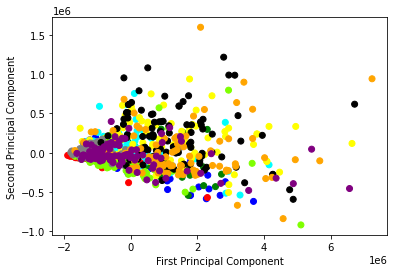

In [32]:
transformed_data_2d = get_pca(data, labels, 2)

plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### 3D PCA

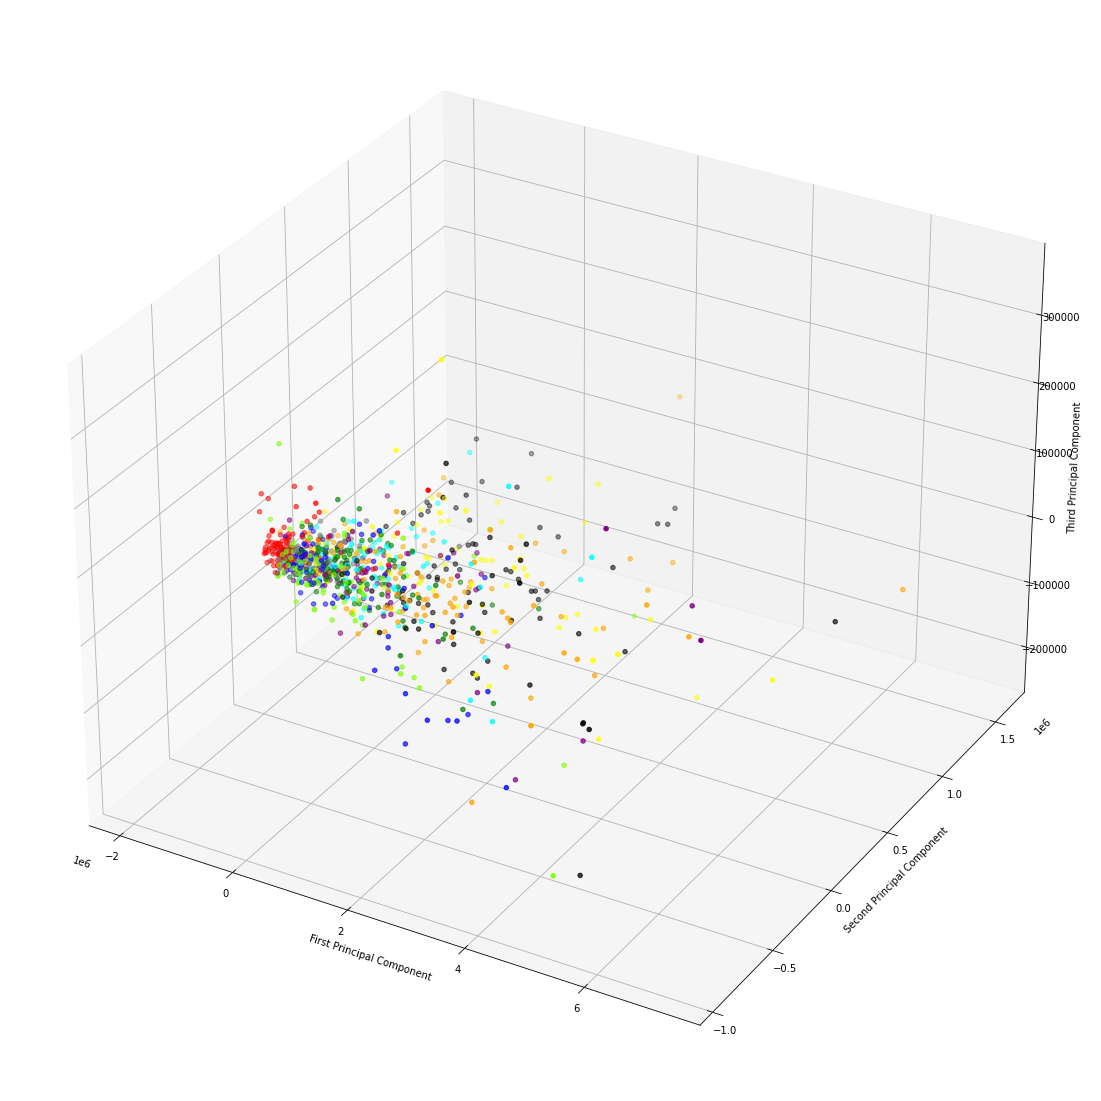

In [33]:
from mpl_toolkits.mplot3d import Axes3D

transformed_data_2d = get_pca(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


### T-sne 2D

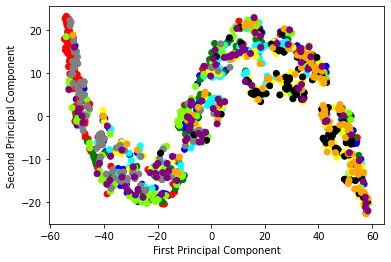

In [34]:
from sklearn.manifold import TSNE

def get_tsne(X, y, num_components):
    tsne = TSNE(n_components=num_components)
    transformed_data = tsne.fit_transform(X)
    return transformed_data

transformed_data_2d = get_tsne(data, labels, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### T-sne 3D

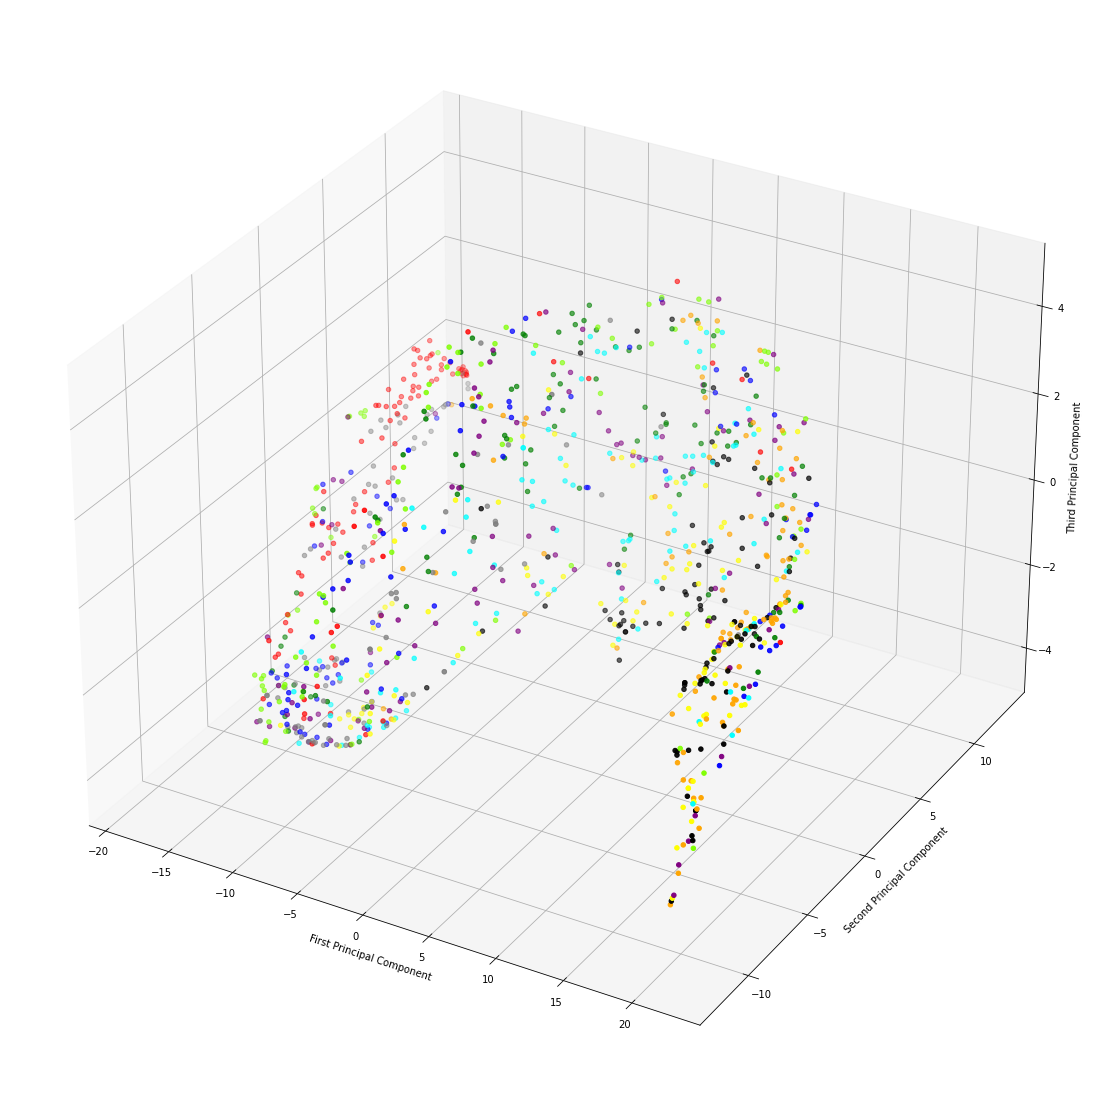

In [35]:
transformed_data_3d = get_tsne(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


## Normalize Data

In [ ]:
data = (data - np.min(data)) / (np.max(data) - np.min(data))

### 2D PCA

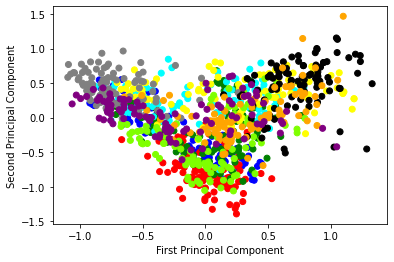

In [37]:
transformed_data_2d = get_pca(data, labels, 2)

plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### 3D PCA

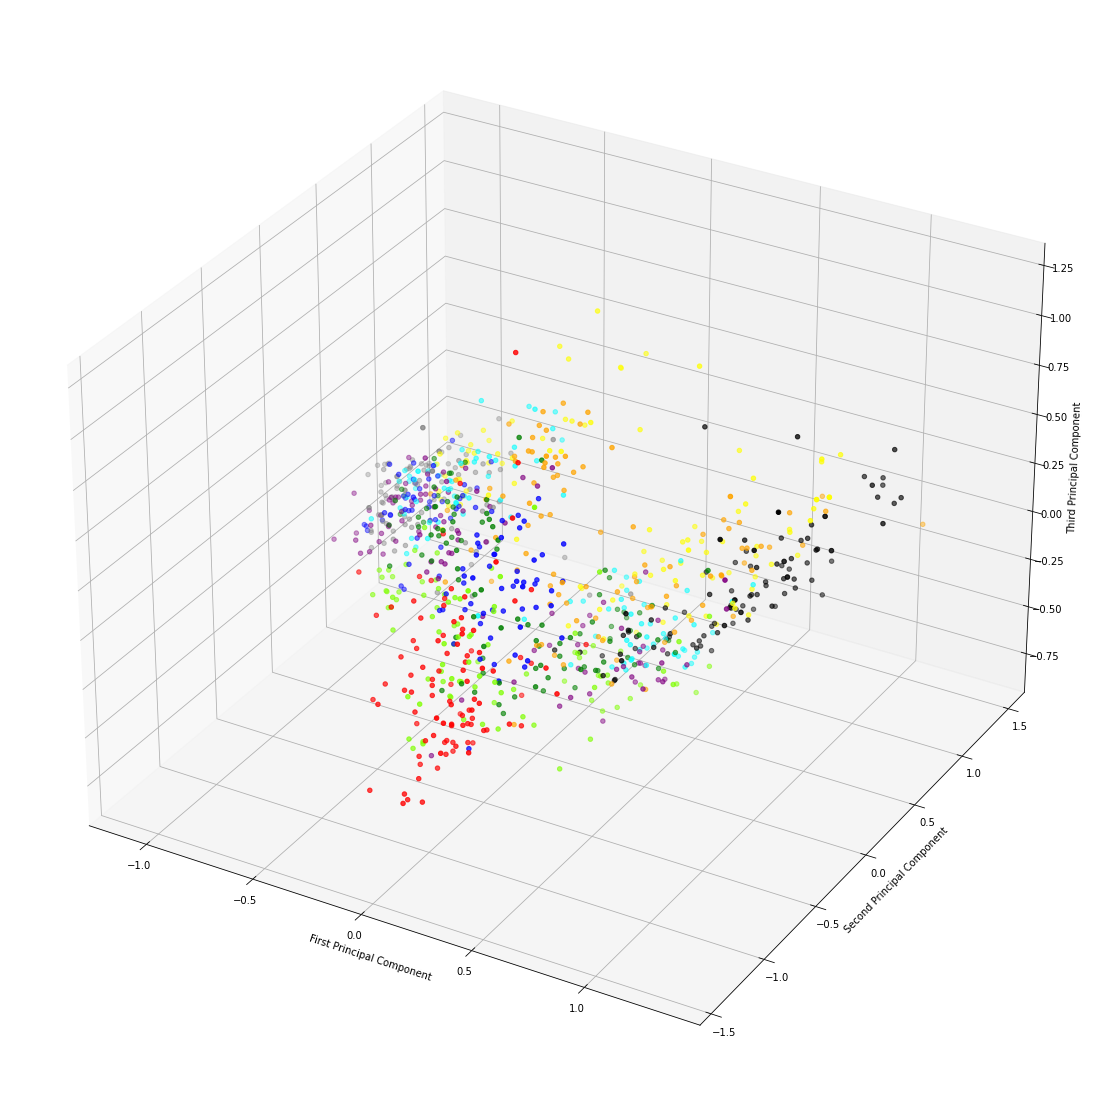

In [38]:
from mpl_toolkits.mplot3d import Axes3D

transformed_data_2d = get_pca(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

### T-sne 2D

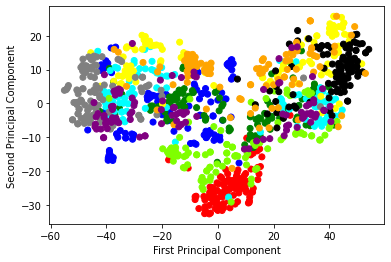

In [39]:
from sklearn.manifold import TSNE

def get_tsne(X, y, num_components):
    tsne = TSNE(n_components=num_components)
    transformed_data = tsne.fit_transform(X)
    return transformed_data

transformed_data_2d = get_tsne(data, labels, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### T-sne 3D

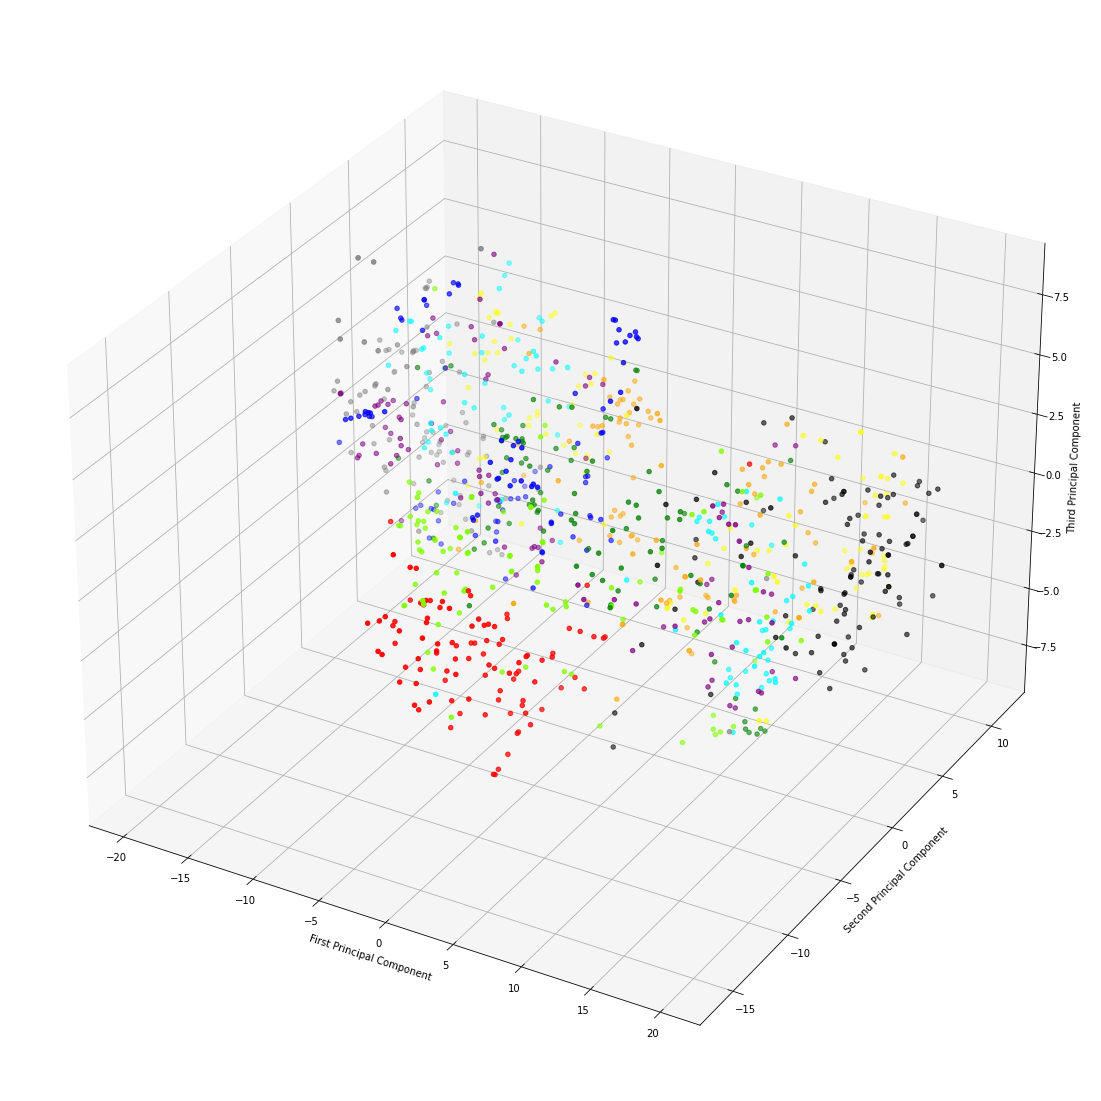

In [40]:
transformed_data_3d = get_tsne(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


## Fix Skewness of Data

In [ ]:
# load data from csv file
data = pd.read_csv('Data/features_30_sec.csv')
labels = data['label']

# convert labels to numbers
labels = labels.apply(lambda x: label_to_int(x))
data.drop(['filename', 'length', 'label'], axis=1, inplace=True)

# normalize data
data = (data - np.min(data)) / (np.max(data) - np.min(data))

### plot histogram of each feature and print skewness of each feature

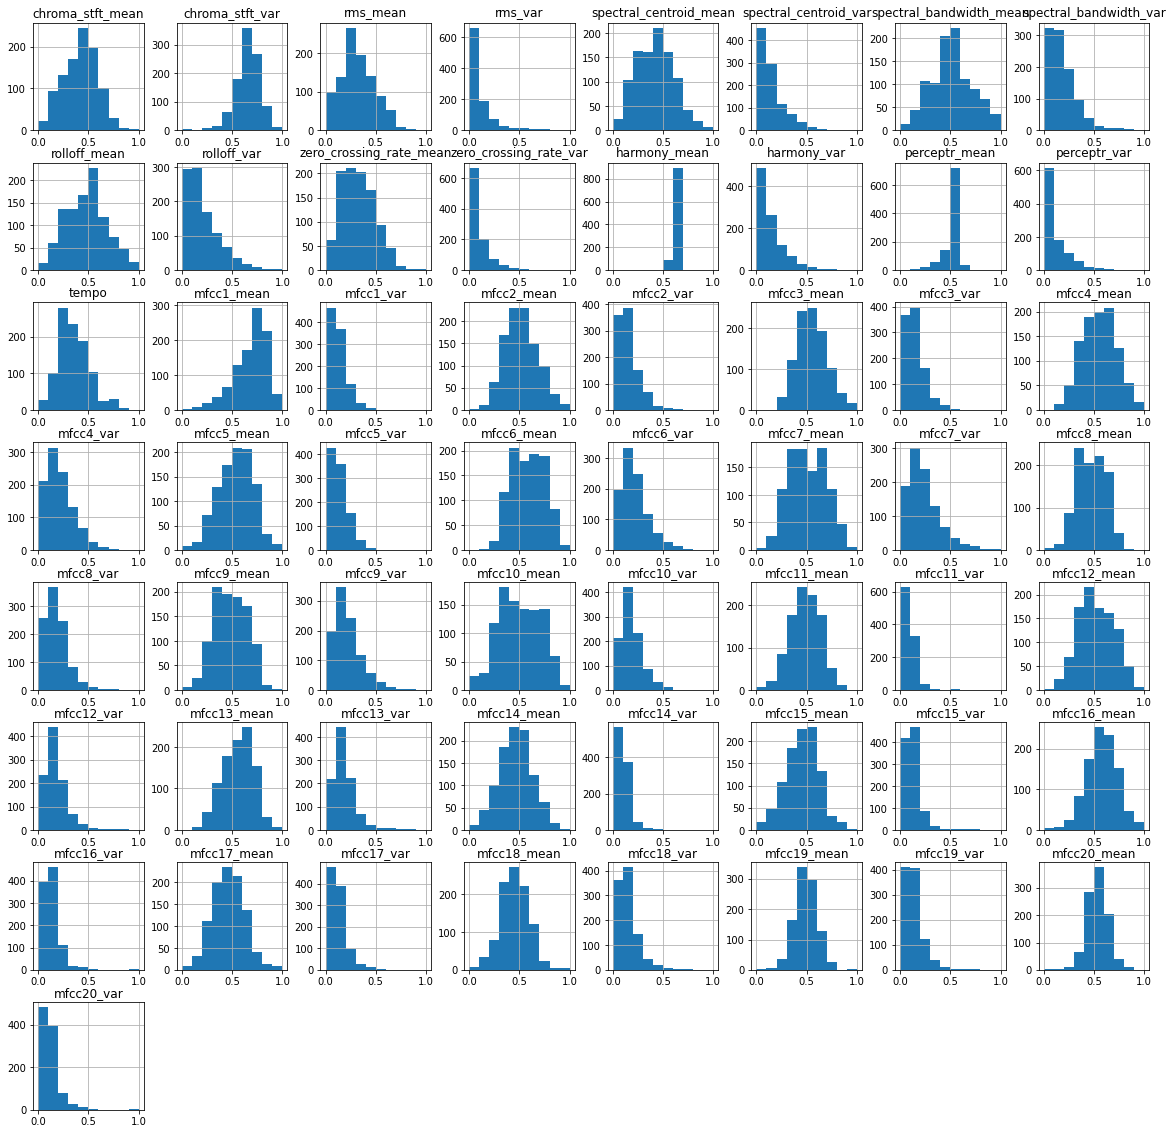

chroma_stft_mean          -0.037826
chroma_stft_var           -0.855287
rms_mean                   0.442650
rms_var                    2.748841
spectral_centroid_mean     0.234540
spectral_centroid_var      1.834951
spectral_bandwidth_mean    0.103004
spectral_bandwidth_var     1.734964
rolloff_mean               0.116961
rolloff_var                1.452964
zero_crossing_rate_mean    0.543045
zero_crossing_rate_var     2.533525
harmony_mean              -6.285543
harmony_var                1.808641
perceptr_mean             -1.481487
perceptr_var               2.108632
tempo                      0.612048
mfcc1_mean                -1.018019
mfcc1_var                  2.495677
mfcc2_mean                 0.263661
mfcc2_var                  1.818657
mfcc3_mean                 0.261092
mfcc3_var                  2.023562
mfcc4_mean                 0.016068
mfcc4_var                  1.024392
mfcc5_mean                -0.208695
mfcc5_var                  1.831114
mfcc6_mean                -0

In [49]:
# plot histogram of each feature
data.hist(figsize=(20, 20))
plt.show()

skewness = data.skew()
print(skewness)

### Use Quantile Transformer to fix skewness

QuantileTransformer


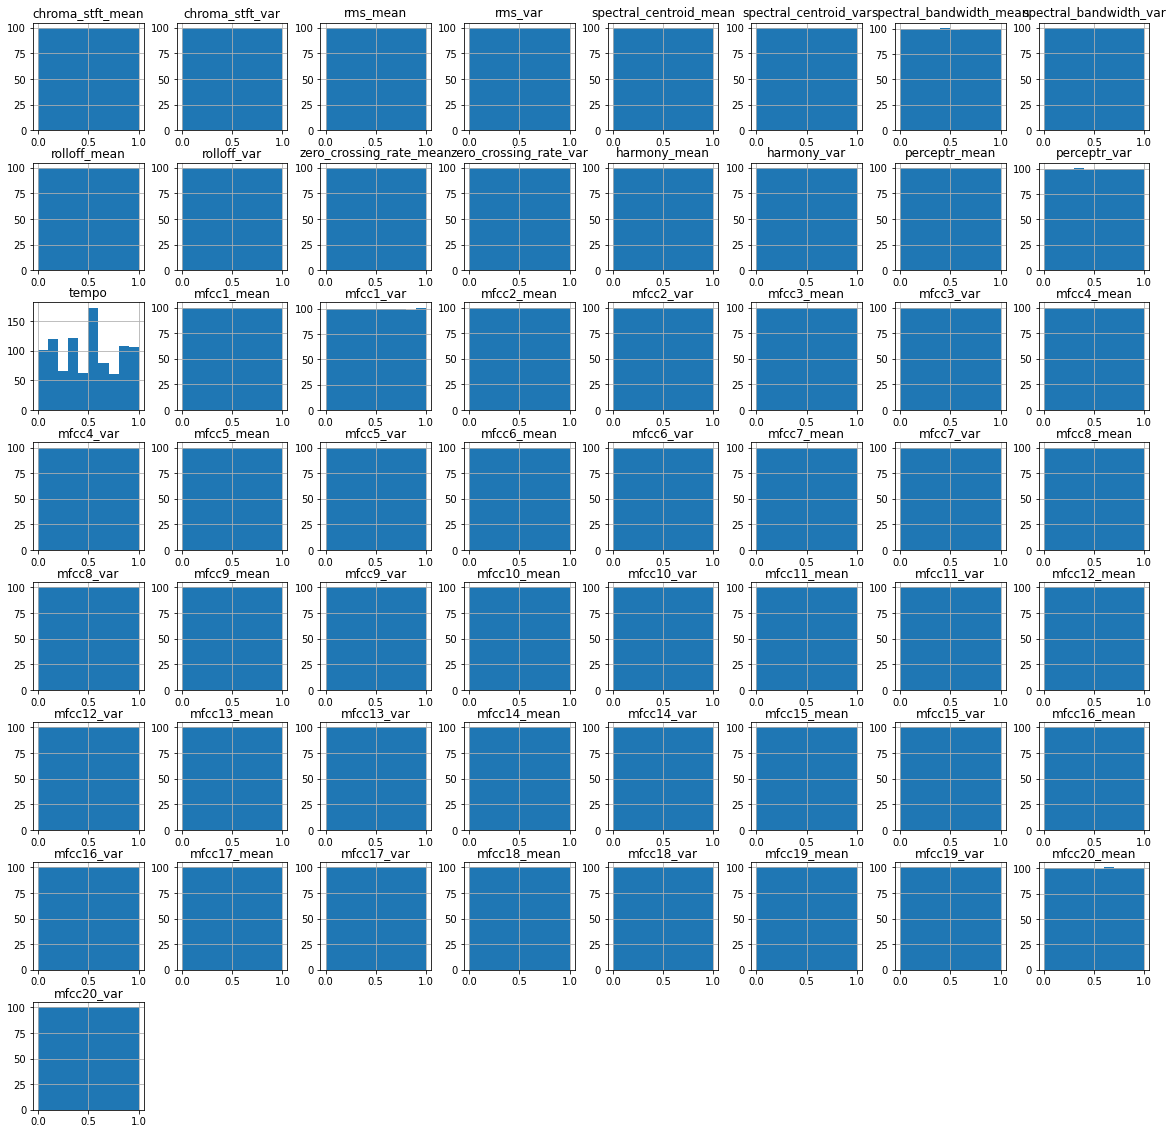

chroma_stft_mean          -8.129438e-07
chroma_stft_var            3.662164e-05
rms_mean                   1.256358e-05
rms_var                    2.073841e-05
spectral_centroid_mean    -1.873429e-07
spectral_centroid_var     -1.536384e-05
spectral_bandwidth_mean    1.032311e-05
spectral_bandwidth_var     9.741832e-09
rolloff_mean              -3.067588e-06
rolloff_var                1.755141e-05
zero_crossing_rate_mean   -2.200030e-07
zero_crossing_rate_var    -1.425680e-07
harmony_mean               1.170893e-07
harmony_var                3.690465e-06
perceptr_mean              1.180260e-07
perceptr_var               2.442622e-05
tempo                     -2.031055e-03
mfcc1_mean                -1.321392e-07
mfcc1_var                  1.334754e-05
mfcc2_mean                 1.506862e-07
mfcc2_var                  1.515789e-05
mfcc3_mean                -1.296935e-05
mfcc3_var                 -3.039327e-07
mfcc4_mean                -7.817408e-06
mfcc4_var                 -1.112694e-05


In [52]:
from sklearn.preprocessing import QuantileTransformer

# normalize data
qt = QuantileTransformer()

data_qt = qt.fit_transform(data)


print("QuantileTransformer")
data_qt = pd.DataFrame(data_qt, columns=data.columns)
data_qt.hist(figsize=(20, 20))
plt.title('Quantile Transformer')
plt.show()

# calculate skewness
skewness = data_qt.skew()
print(skewness)

### 2D PCA

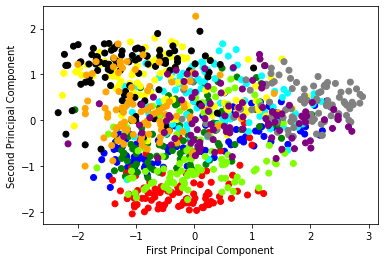

In [62]:
transformed_data_2d = get_pca(data_qt, labels, 2)

plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### 3D PCA

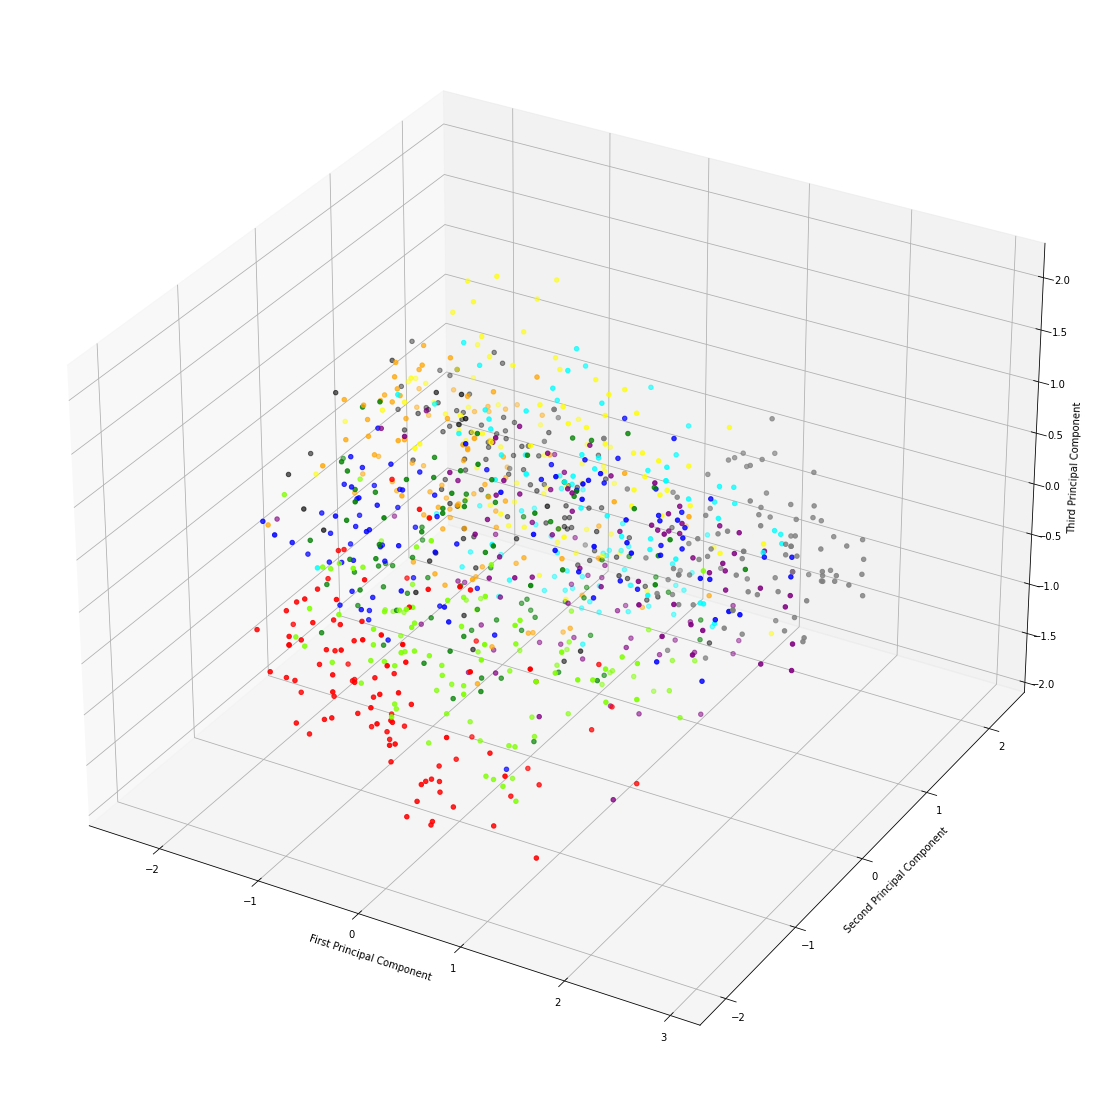

In [64]:
transformed_data_2d = get_pca(data_qt, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

### T-sne 2D

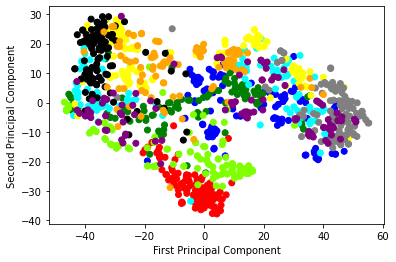

In [65]:
from sklearn.manifold import TSNE

def get_tsne(X, y, num_components):
    tsne = TSNE(n_components=num_components)
    transformed_data = tsne.fit_transform(X)
    return transformed_data

transformed_data_2d = get_tsne(data_qt, labels, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### T-sne 3D

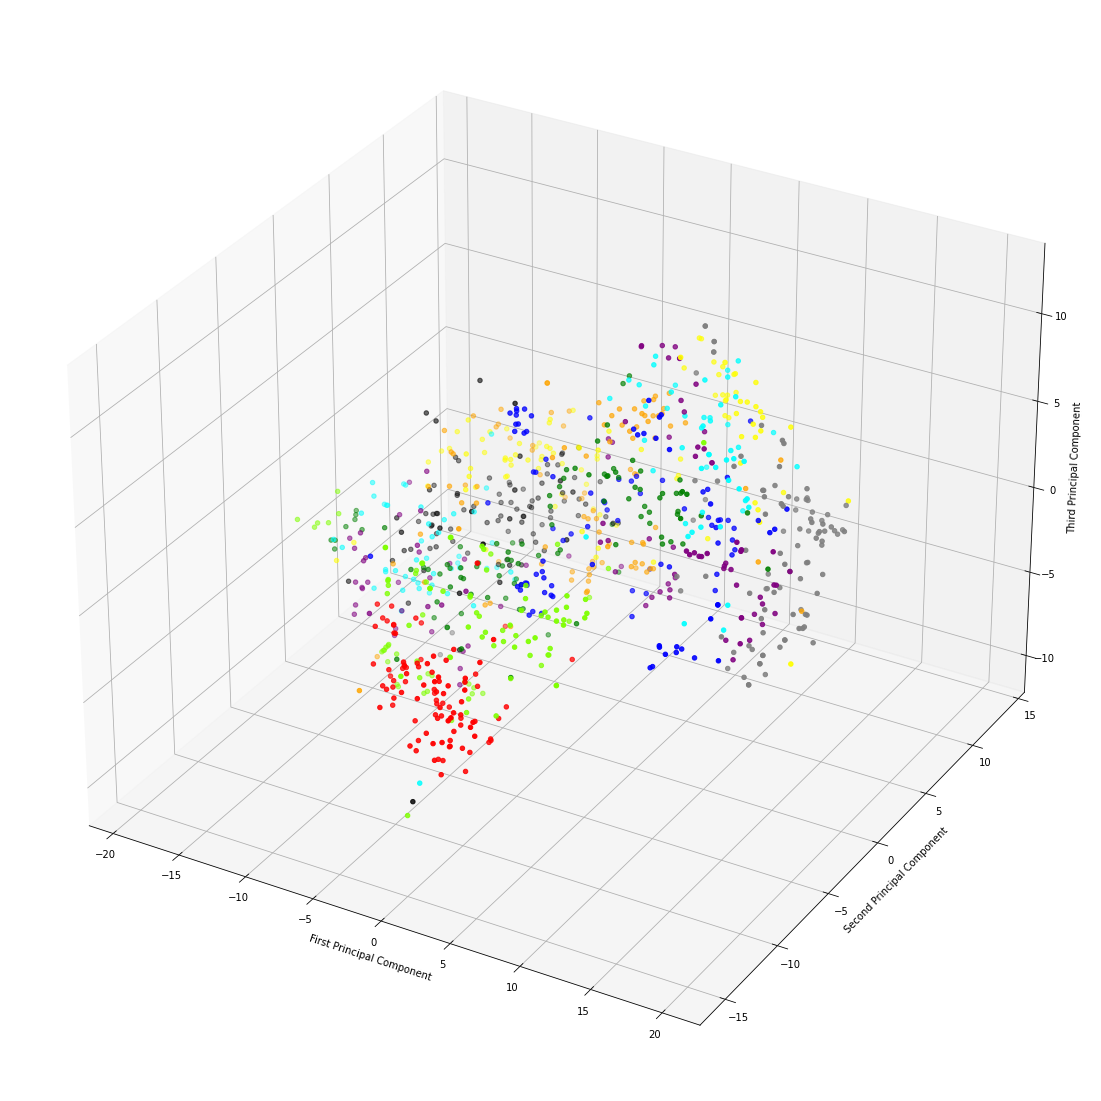

In [66]:
transformed_data_3d = get_tsne(data_qt, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


### Use Quantile Transformer to fix skewness

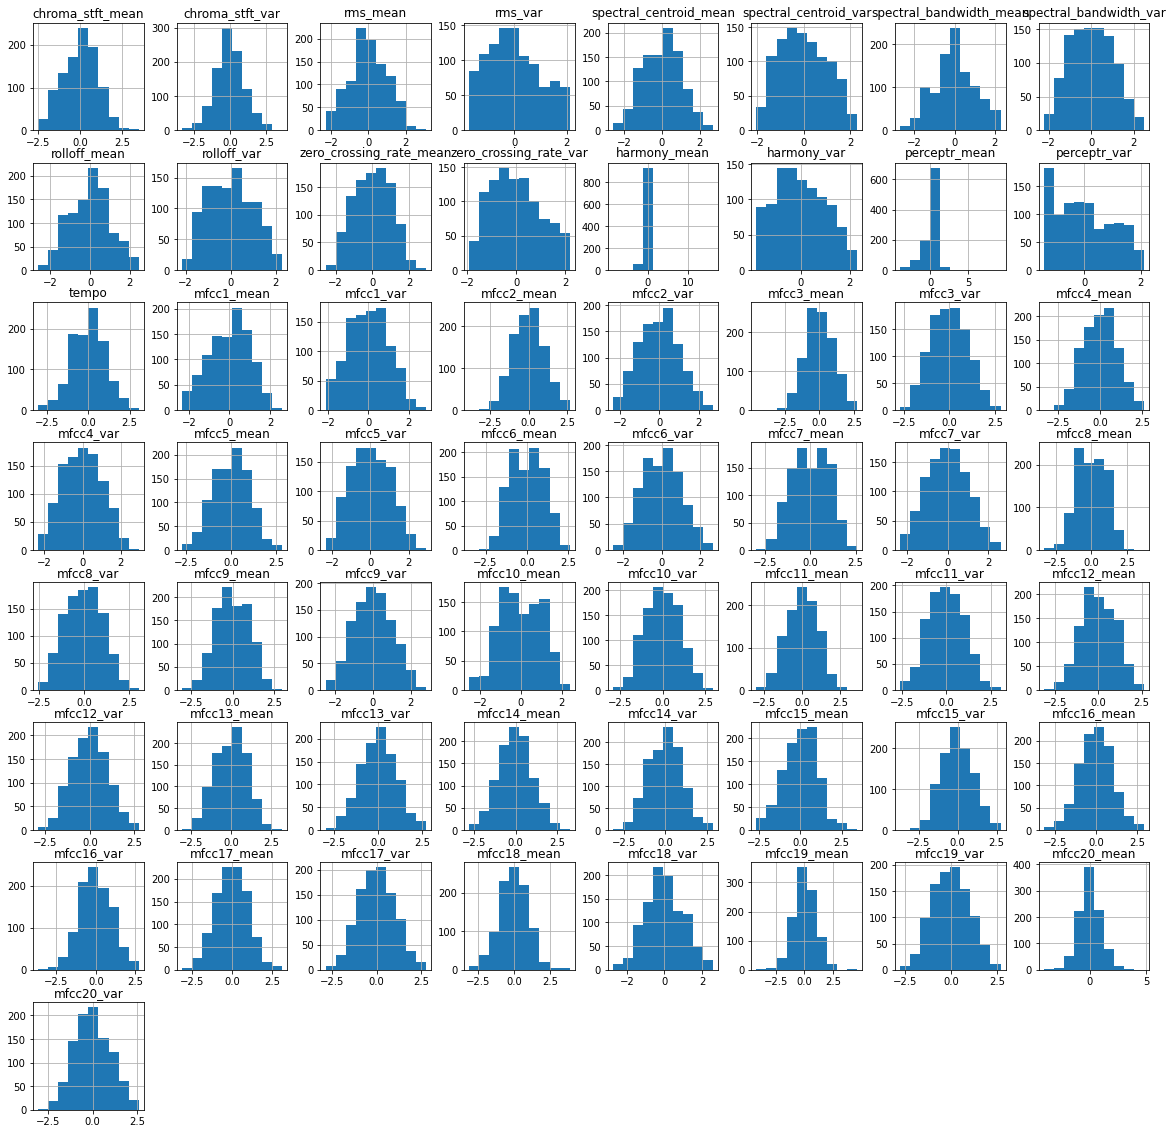

chroma_stft_mean          -0.032856
chroma_stft_var            0.050143
rms_mean                  -0.005361
rms_var                    0.298845
spectral_centroid_mean    -0.022290
spectral_centroid_var      0.172080
spectral_bandwidth_mean   -0.025472
spectral_bandwidth_var     0.102207
rolloff_mean              -0.029790
rolloff_var                0.120438
zero_crossing_rate_mean    0.006763
zero_crossing_rate_var     0.254747
harmony_mean               2.831997
harmony_var                0.170420
perceptr_mean              0.635324
perceptr_var               0.263970
tempo                      0.000228
mfcc1_mean                -0.158542
mfcc1_var                  0.072578
mfcc2_mean                -0.004507
mfcc2_var                  0.076697
mfcc3_mean                 0.000283
mfcc3_var                  0.075923
mfcc4_mean                -0.024402
mfcc4_var                  0.046554
mfcc5_mean                -0.040076
mfcc5_var                  0.087354
mfcc6_mean                -0

In [67]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

data_pt = pt.fit_transform(data)

# plot histogram of each feature
data_pt = pd.DataFrame(data_pt, columns=data.columns)
data_pt.hist(figsize=(20, 20))
plt.title('Power Transformer')
plt.show()

# calculate skewness
skewness = data_pt.skew()
print(skewness)

### 2D PCA

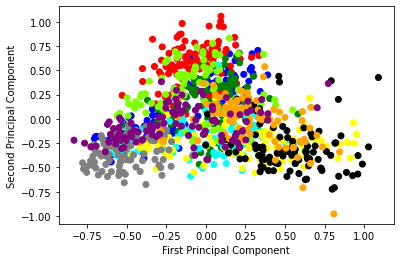

In [68]:
transformed_data_2d = get_pca(data, labels, 2)

plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## 3D PCA

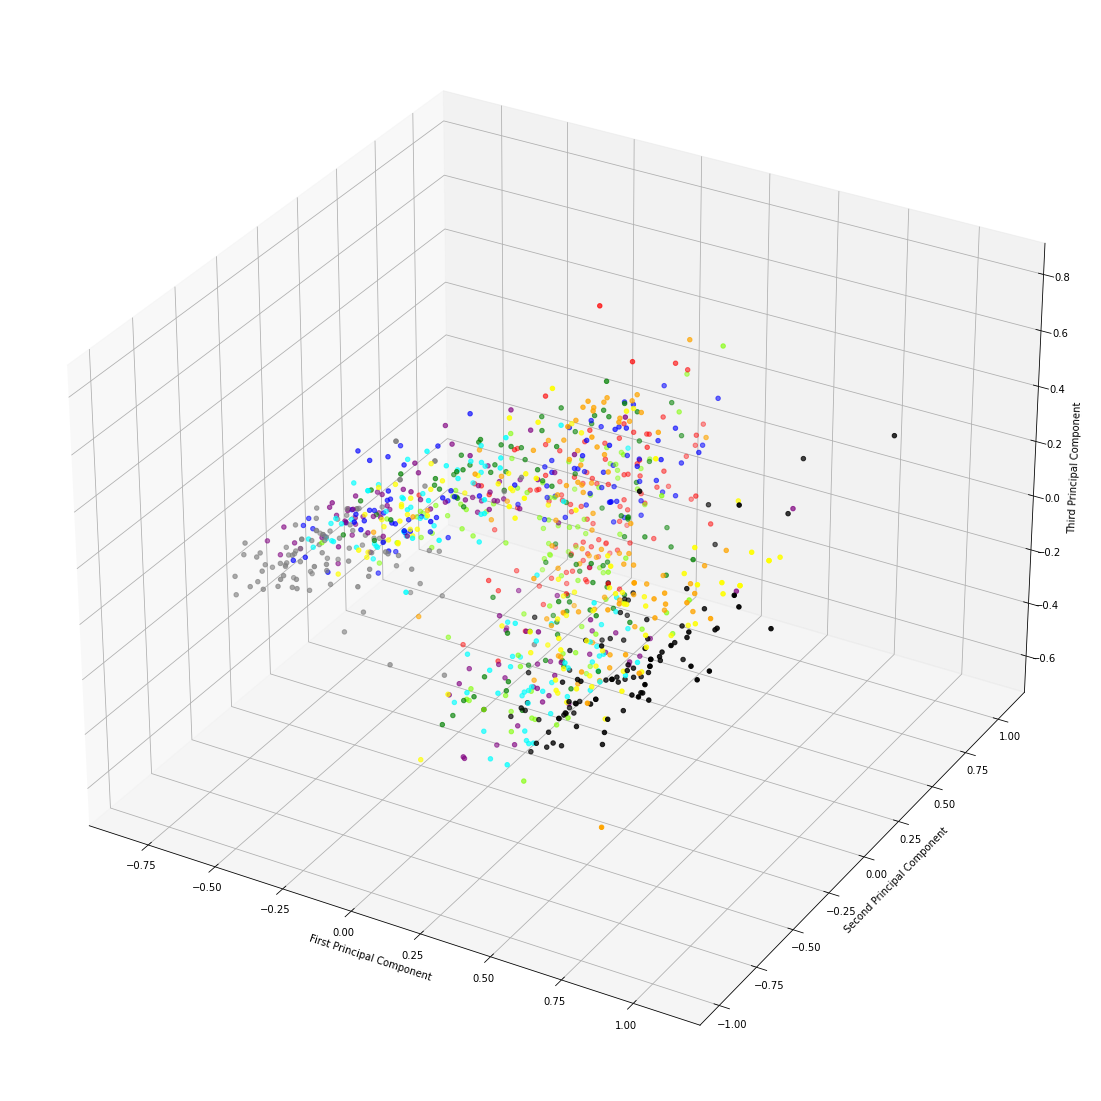

In [69]:
from mpl_toolkits.mplot3d import Axes3D

transformed_data_2d = get_pca(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

### 2D T-sne

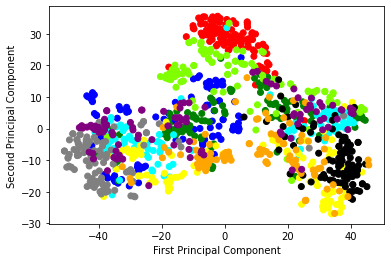

In [70]:
from sklearn.manifold import TSNE

def get_tsne(X, y, num_components):
    tsne = TSNE(n_components=num_components)
    transformed_data = tsne.fit_transform(X)
    return transformed_data

transformed_data_2d = get_tsne(data, labels, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### T-sne 3D

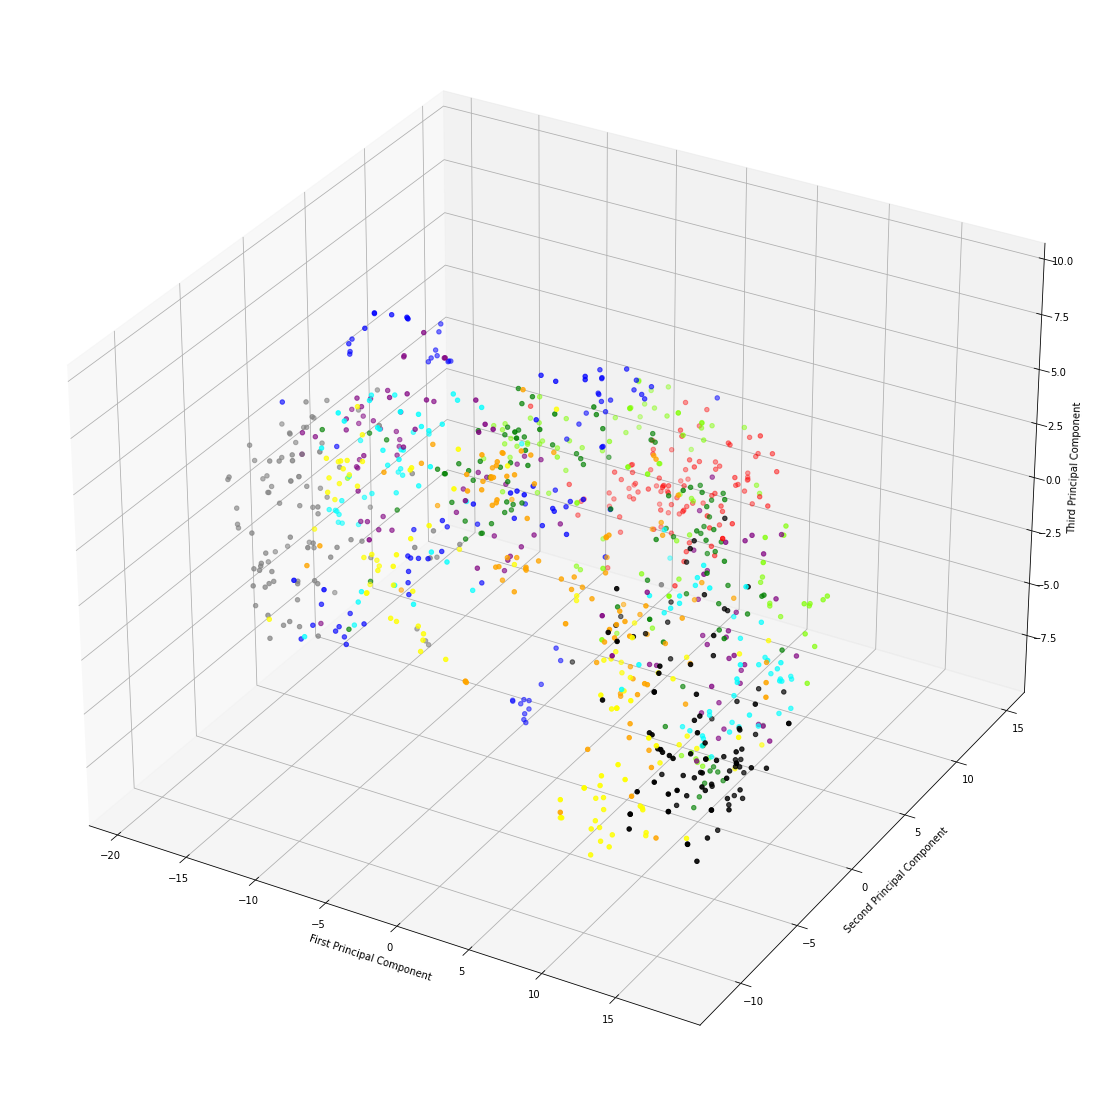

In [71]:
transformed_data_3d = get_tsne(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()
